## PROBLEM STATEMENT-1
Prepare a classification model using Naive Bayes for salary data

In [84]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.utils.multiclass import type_of_target
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [19]:
# Reading the dataset
sal_train = pd.read_csv('SalaryData_Train.csv')

### EDA

In [20]:
sal_train.head(7)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K


In [21]:
sal_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12347 entries, 0 to 12346
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            12347 non-null  int64 
 1   workclass      12347 non-null  object
 2   education      12347 non-null  object
 3   educationno    12347 non-null  int64 
 4   maritalstatus  12347 non-null  object
 5   occupation     12347 non-null  object
 6   relationship   12347 non-null  object
 7   race           12347 non-null  object
 8   sex            12347 non-null  object
 9   capitalgain    12347 non-null  int64 
 10  capitalloss    12347 non-null  int64 
 11  hoursperweek   12347 non-null  int64 
 12  native         12347 non-null  object
 13  Salary         12346 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.3+ MB


In [22]:
sal_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,12347.000000,12347.000000,12347.000000,12347.000000,12347.000000
mean,38.372236,10.121163,1074.900867,89.272455,41.009395
std,13.094274,2.532644,7359.802028,403.796369,11.841127
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [23]:
sal_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           1
dtype: int64

In [24]:
sal_train.shape

(12347, 14)

In [25]:
# Getting the number of rows duplicated in the dataset
sal_train.duplicated().sum()

714

In [26]:
sal_train.value_counts().sum()

12346

In [27]:
# Unqiue values from Salary column
sal_train['Salary'].unique()

array([' <=50K', ' >50K', nan], dtype=object)

### Inference:
As we can see there are 12347 rows and 14 columns. There are null values in the datasets

### Test Data

In [28]:
sal_test = pd.read_csv('SalaryData_Test.csv')

### EDA

In [29]:
sal_test.head(7)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K
5,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103.0,0.0,32.0,United-States,>50K
6,24,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K


In [30]:
sal_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            811 non-null    int64  
 1   workclass      811 non-null    object 
 2   education      811 non-null    object 
 3   educationno    811 non-null    int64  
 4   maritalstatus  811 non-null    object 
 5   occupation     811 non-null    object 
 6   relationship   810 non-null    object 
 7   race           810 non-null    object 
 8   sex            810 non-null    object 
 9   capitalgain    810 non-null    float64
 10  capitalloss    810 non-null    float64
 11  hoursperweek   810 non-null    float64
 12  native         810 non-null    object 
 13  Salary         810 non-null    object 
dtypes: float64(3), int64(2), object(9)
memory usage: 88.8+ KB


In [31]:
sal_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,811.000000,811.000000,810.000000,810.000000,810.000000
mean,37.520345,10.085080,1277.746914,89.106173,40.941975
std,12.850345,2.578431,8217.102563,402.568611,11.835412
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,27.000000,9.000000,0.000000,0.000000,40.000000
50%,36.000000,10.000000,0.000000,0.000000,40.000000
75%,46.000000,13.000000,0.000000,0.000000,45.000000
max,80.000000,16.000000,99999.000000,2444.000000,99.000000


In [32]:
sal_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     1
race             1
sex              1
capitalgain      1
capitalloss      1
hoursperweek     1
native           1
Salary           1
dtype: int64

In [35]:
sal_test.shape

(811, 14)

In [33]:
sal_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,811.000000,811.000000,810.000000,810.000000,810.000000
mean,37.520345,10.085080,1277.746914,89.106173,40.941975
std,12.850345,2.578431,8217.102563,402.568611,11.835412
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,27.000000,9.000000,0.000000,0.000000,40.000000
50%,36.000000,10.000000,0.000000,0.000000,40.000000
75%,46.000000,13.000000,0.000000,0.000000,45.000000
max,80.000000,16.000000,99999.000000,2444.000000,99.000000


In [34]:
# Getting the number of rows duplicated in the dataset
sal_test.duplicated().sum()

4

### Inference:
There are 811 rows and 14 columns in  the test dataset. There are null values.

## Performing Feature Engineering

In [37]:
print('Shape of train dataframe before dropping duplicates',sal_train.shape)
print('Shape of test dataframe before dropping duplicates',sal_test.shape)

Shape of train dataframe before dropping duplicates (12347, 14)
Shape of test dataframe before dropping duplicates (811, 14)


In [38]:
# Now will drop the duplicate rows from the training datset
sal_train.drop_duplicates(keep = False, inplace = True) # keep = Flase removes all the occurrences of duplicated rows.

In [39]:
# Checking the shape of altered dataset
sal_train.shape

(11093, 14)

In [40]:
# Now will drop the duplicate rows from the testing datset
sal_test.drop_duplicates(keep = False, inplace = True)

In [41]:
# Checking the shape of altered dataset
sal_test.shape

(803, 14)

In [42]:
# Dropping native column from both the datasets
sal_train.drop('native', axis = 1, inplace = True)
sal_test.drop('native', axis = 1, inplace = True)

In [44]:
sal_train.head(7)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,<=50K


In [45]:
sal_test.head(7)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,<=50K
5,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103.0,0.0,32.0,>50K
6,24,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0.0,0.0,40.0,<=50K


### Performing Label Encoding on Train and Test datasets

In [47]:
# Making a list of categorical columns
cols=['workclass','education','maritalstatus','occupation','relationship','race','sex','Salary']  
le=preprocessing.LabelEncoder()
for col in cols:    
    sal_train[col]=le.fit_transform(sal_train[col])
    sal_test[col]=le.fit_transform(sal_test[col])
    print(le.classes_)

[' Federal-gov' ' Local-gov' ' Private' ' Self-emp-inc'
 ' Self-emp-not-inc' ' State-gov']
[' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college']
[' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']
[' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']
[' Husband' ' Not-in-family' ' Other-relative' ' Own-child' ' Unmarried'
 ' Wife' nan]
[' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Black' ' Other' ' White'
 nan]
[' Female' ' Male' nan]
[' <=50K' ' >50K' nan]


In [48]:
# Uniques values in Salary column
sal_train['Salary'].value_counts()

0    8296
1    2796
2       1
Name: Salary, dtype: int64

In [49]:
print("Percent of data labelled as 0:",((sal_train['Salary']==0).sum()/len(sal_train)*100))
print("Percent of data labelled as 1:",((sal_train['Salary']==1).sum()/len(sal_train)*100))

Percent of data labelled as 0: 74.78590101866041
Percent of data labelled as 1: 25.20508428738844


### Using ExtraTreesClassifier on Train dataset

In [51]:
# Splitting the train data
x=sal_train.iloc[:,:-1]
y=sal_train.iloc[:,-1]

In [52]:
# Filling missing values
x = x.fillna(0)
x

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek
0,39,5,9,13,4,0,1,4,1,2174,0,40
1,50,4,9,13,2,3,0,4,1,0,0,13
2,38,2,11,9,0,5,1,4,1,0,0,40
3,53,2,1,7,2,5,0,2,1,0,0,40
4,28,2,9,13,2,9,5,2,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...
12342,36,2,7,12,2,0,0,4,1,0,0,40
12343,23,1,9,13,4,9,1,4,0,0,0,40
12344,47,4,15,10,2,3,0,4,1,0,0,80
12345,61,2,11,9,0,0,1,4,0,0,0,40


In [53]:
y

0        0
1        0
2        0
3        0
4        0
        ..
12342    1
12343    0
12344    0
12345    0
12346    2
Name: Salary, Length: 11093, dtype: int32

In [55]:
# Checking Target variable
type_of_target(y)

'multiclass'

In [56]:
model = ExtraTreesClassifier(n_estimators=10)
model.fit(x,y)
print(model.feature_importances_)

[0.22639606 0.05393416 0.04894228 0.08049731 0.11238548 0.0943674
 0.06483245 0.02310656 0.03144706 0.09366624 0.03290177 0.13752323]


### Inference:
The ExtraTreesClassifier model's output is an array that shows the calculated feature importances. Each element's value in the array represents the relevance rating of a certain feature. The feature importances are arranged in the same order as the features in the input data.

The following feature importances are based on the output:


Age = 0.21423274, Workclass = 0.05605706, Education = 0.04343046, Education No = 0.08668107, Marital Status = 0.09995153, Occupation = 0.10306183, Relationship = 0.07301583, Race = 0.0212474, Sex is equal to 0.03324267, Capital Gain = 0.10617985, Capital Loss = 0. The relative significance of each factor in predicting the target variable is shown by these feature importances. The predictions of the model are thought to be more influenced by features with higher significance scores.


In [57]:
model

ExtraTreesClassifier(n_estimators=10)

In [58]:
cols=['age','workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek']
feature_imp=pd.Series(model.feature_importances_,index=cols).sort_values(ascending=False)
feature_imp

age              0.226396
hoursperweek     0.137523
maritalstatus    0.112385
occupation       0.094367
capitalgain      0.093666
educationno      0.080497
relationship     0.064832
workclass        0.053934
education        0.048942
capitalloss      0.032902
sex              0.031447
race             0.023107
dtype: float64

### Inference:
The relative relevance of each characteristic in predicting the target variable is indicated by the feature importance scores. In this instance, the characteristic has a greater impact on the model's predictions the higher the score.

Inferring from the results, we can observe that 'age' (0.214233) has the greatest priority score, followed by 'hours per week' (0.129037) and 'capitalgain' (0.106180). On the other hand, 'race' gets the lowest importance rating (0.021247).

These feature importances can be used to find the model's most important features and learn more about the variables that have a bigger impact on the target variable's prediction.


### Visualization

#### Bar plot

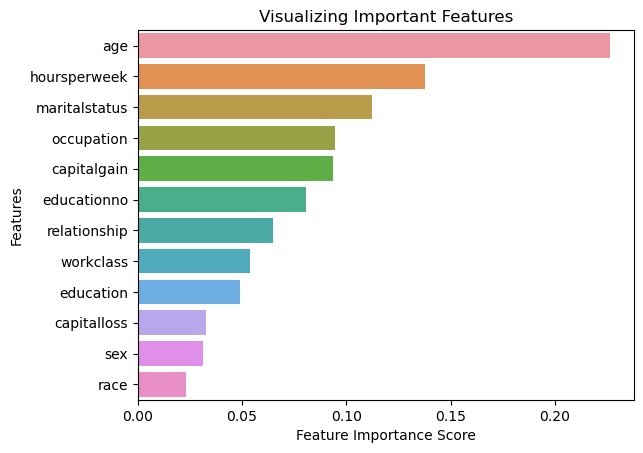

In [59]:
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()


In [60]:
sal_train.drop(['workclass','education','capitalloss','sex','race'],axis=1,inplace=True)

In [61]:
sal_test.drop(['workclass','education','capitalloss','sex','race'],axis=1,inplace=True)

In [62]:
#### Here we dropped the columns from both the datasets which had least feature imoprtance.

In [63]:
sal_train.head(7)

,age,educationno,maritalstatus,occupation,relationship,capitalgain,hoursperweek,Salary
0,39,13,4,0,1,2174,40,0
1,50,13,2,3,0,0,13,0
2,38,9,0,5,1,0,40,0
3,53,7,2,5,0,0,40,0
4,28,13,2,9,5,0,40,0
5,37,14,2,3,5,0,40,0
6,49,5,3,7,1,0,16,0


In [64]:
sal_test.head(7)

,age,educationno,maritalstatus,occupation,relationship,capitalgain,hoursperweek,Salary
0,25,7,4,6,3,0.0,40.0,0
1,38,9,2,4,0,0.0,50.0,0
2,28,12,2,10,0,0.0,40.0,1
3,44,10,2,6,0,7688.0,40.0,1
4,34,6,4,7,1,0.0,30.0,0
5,63,15,2,9,0,3103.0,32.0,1
6,24,10,4,7,4,0.0,40.0,0


In [66]:
sal_train[['age','capitalgain','hoursperweek']].describe()

,age,capitalgain,hoursperweek
count,11093.000000,11093.000000,11093.000000
mean,38.960245,1193.640043,41.239430
std,13.147330,7754.378884,12.172808
min,17.000000,0.000000,1.000000
25%,29.000000,0.000000,40.000000
50%,38.000000,0.000000,40.000000
75%,48.000000,0.000000,45.000000
max,90.000000,99999.000000,99.000000


In [67]:
sal_test[['age','capitalgain','hoursperweek']].describe()

,age,capitalgain,hoursperweek
count,803.000000,802.000000,802.000000
mean,37.508095,1290.492519,40.963840
std,12.848372,8257.037645,11.890362
min,17.000000,0.000000,1.000000
25%,27.000000,0.000000,40.000000
50%,36.000000,0.000000,40.000000
75%,46.000000,0.000000,45.000000
max,80.000000,99999.000000,99.000000


### Standardization

In [68]:
scaler=StandardScaler()
# Fitting on train data
scaler.fit(sal_train[['age','capitalgain','hoursperweek']])
# Transforming train data
sal_train[['age','capitalgain','hoursperweek']]= scaler.transform(sal_train[['age','capitalgain','hoursperweek']])
# Transforming test data
sal_test[['age','capitalgain','hoursperweek']]= scaler.transform(sal_test[['age','capitalgain','hoursperweek']])

In [70]:
sal_train['Salary'].value_counts()

0    8296
1    2796
2       1
Name: Salary, dtype: int64

### Model Building
### Naive Bayes

In [71]:
# Spltting the train data
X_train=sal_train.iloc[:,:-1]
Y_train=sal_train.iloc[:,-1]

In [72]:
X_train = X_train.fillna(0)

In [73]:
# Splitting test data
X_test=sal_test.iloc[:,:-1]
Y_test=sal_test.iloc[:,-1]

In [74]:
X_test = X_test.fillna(0)

In [77]:
# Gaussian Naive Bayes
nb = GaussianNB()
nb.fit(X_train,Y_train)

GaussianNB()

In [78]:
y_pred =  nb.predict(X_test)

In [79]:
# Confusion Matrix
conf_matrix1=confusion_matrix(Y_test, y_pred)
conf_matrix1

array([[588,  19,   0],
       [149,  46,   0],
       [  1,   0,   0]], dtype=int64)

### Inference:
The performance of a classification model is summed up in a 2-dimensional array called the confusion matrix. The instances in a real class are represented in each row of the matrix, whereas the occurrences in a predicted class are represented in each column.

The confusion matrix in this instance has three rows and three columns, each of which represents one class. Let's dissect the values:

Class '0-Less than 50K'

588 True Positives, 588 False Positives. 0 Class "1-Above 50K": 19 False Negatives (FN):

TP: 46 FP: 149 Class '2-Another class': FN: 0

FN: 0 TP: 0 FP: 1 The counts of examples for each class that were correctly classified (TP), wrongly classified (FP), or misclassified (FN) are represented by the values in the confusion matrix.

It's important to note that the class '2-Another class' has no true positives, which means that this class has never been accurately predicted.


Text(20.722222222222214, 0.5, 'True Class')

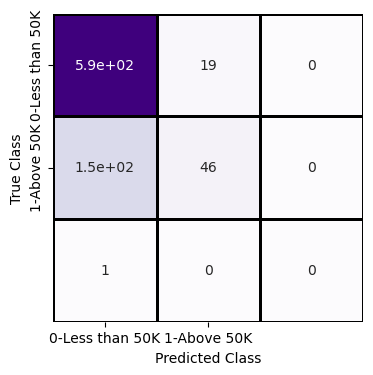

In [81]:
fig, ax= plt.subplots(1,1, figsize=(4,4),dpi=100)

xlabels=['0-Less than 50K','1-Above 50K']
ylabels=['0-Less than 50K','1-Above 50K']

sns.heatmap(conf_matrix1,annot=True, cbar=None, cmap="Purples",xticklabels=xlabels,yticklabels=ylabels,
            linewidths=1,linecolor='black')
ax.set_xlabel('Predicted Class')
ax.set_ylabel('True Class')


In [85]:
# Assuming your data has three classes
names = ['0-Less than 50K', '1-Above 50K', '2-Another class']
print(classification_report(Y_test, y_pred, target_names=names))
print(classification_report(Y_test, y_pred))

                 precision    recall  f1-score   support

0-Less than 50K       0.80      0.97      0.87       607
    1-Above 50K       0.71      0.24      0.35       195
2-Another class       0.00      0.00      0.00         1

       accuracy                           0.79       803
      macro avg       0.50      0.40      0.41       803
   weighted avg       0.77      0.79      0.75       803

              precision    recall  f1-score   support

           0       0.80      0.97      0.87       607
           1       0.71      0.24      0.35       195
           2       0.00      0.00      0.00         1

    accuracy                           0.79       803
   macro avg       0.50      0.40      0.41       803
weighted avg       0.77      0.79      0.75       803



### Inference:
The overall accuracy is 0.79, and both the macro average (calculated by averaging the metrics over all classes) and the weighted average (weighted by support) are shown.

Based on this data, we can see how well each classifier performed, with class '0-Less than 50K' having the best precision, recall, and F1-score. There are no accurately predicted occurrences for class "2-Another class," yielding a precision, recall, and F1-score of 0. The classifier's total accuracy is 0.79.


### Histogram:


Text(0, 0.5, 'Frequency')

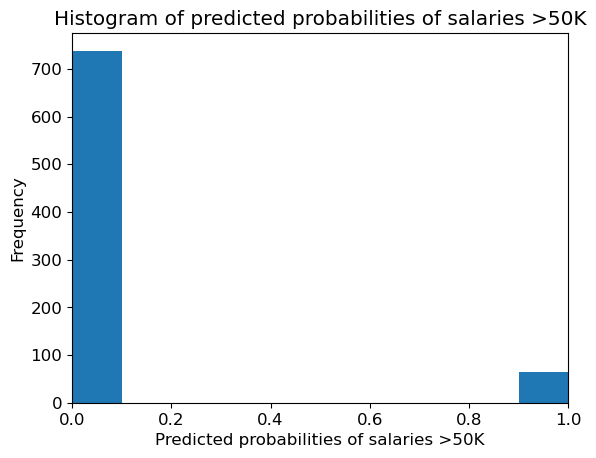

In [86]:
# adjust the font size 
plt.rcParams['font.size'] = 12
# plot histogram with 10 bins
plt.hist(y_pred, bins = 10)
# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')
# set the x-axis limit
plt.xlim(0,1)
# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

### Inference:
From the above plot we can understand the spread or concentration of probabilities for salaries greater than 50k.